###Machine Learning Problem 1 Regression
###Aaron McCarley
###CS430-ON
###Machine Learning in the Cloud

###Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Imports for specific models
Include imports for Linear Regression, and both SVC and SVR

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

###Imports for buiding transformers, the pipleine, and splitting data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

###Import performance measures to evaluate the model

In [ ]:
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from matplotlib import style
style.use('fivethirtyeight')

from sklearn.metrics import confusion_matrix as plot_cm
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

###Set config option to display the pipeline diagram

In [ ]:
from sklearn import set_config
set_config(display='diagram')

###SVC Classification

###Load the Health.csv into a data frame named df.
###Rename the columns according to Table 1: Columns Names.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Health.csv')
df

,OBS,ID,SEX,AGE,MARITAL,EDUCAT,EMPLOY,INCOME,RELIG,C1,...,C20,CESD,CASES,DRINK,HEALTH,REGDOC,TREAT,BEDDAYS,ACUTEILL,CHRONILL
0,1,1,2,68,5,2,4,4,1,0,...,0,0,0,2,2,1,1,0,0,1
1,2,2,1,58,3,4,1,15,1,0,...,0,4,0,1,1,1,1,0,0,1
2,3,3,2,45,2,3,1,28,1,0,...,0,4,0,1,2,1,1,0,0,0
3,4,4,2,50,3,3,3,9,1,0,...,0,5,0,2,1,1,2,0,0,1
4,5,5,2,33,4,3,1,35,1,0,...,0,6,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,290,290,1,49,4,7,1,23,3,0,...,0,0,0,1,2,2,1,0,0,1
290,291,291,1,45,2,5,1,35,3,0,...,0,3,0,1,1,1,2,0,0,0
291,292,292,1,64,2,4,1,55,3,0,...,0,9,0,1,2,1,2,0,0,1
292,293,293,1,43,3,6,1,28,1,0,...,0,2,0,2,1,1,2,0,1,1


In [ ]:
df.dtypes

OBS         int64
ID          int64
SEX         int64
AGE         int64
MARITAL     int64
EDUCAT      int64
EMPLOY      int64
INCOME      int64
RELIG       int64
C1          int64
C2          int64
C3          int64
C4          int64
C5          int64
C6          int64
C7          int64
C8          int64
C9          int64
C10         int64
C11         int64
C12         int64
C13         int64
C14         int64
C15         int64
C16         int64
C17         int64
C18         int64
C19         int64
C20         int64
CESD        int64
CASES       int64
DRINK       int64
HEALTH      int64
REGDOC      int64
TREAT       int64
BEDDAYS     int64
ACUTEILL    int64
CHRONILL    int64
dtype: object

###Create a data frame called y of your output. This will be your target variable that you are trying to predict.

In [ ]:
X = df[['CESD', 'INCOME', 'EDUCAT', 'SEX']]
y = df['CASES']

In [ ]:
print ("Shape of the data, excluding dependent variable", X.shape)

Shape of the data, excluding dependent variable (294, 4)


In [ ]:
print ("Shape of the data, excluding independent variables", y.shape)

Shape of the data, excluding independent variables (294,)


###Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

####Standardize the Datasets

In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head();

In [ ]:
X_test.head();

####I am using Linear Regression to fit a classifier

In [ ]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [ ]:
np.array(y_pred);

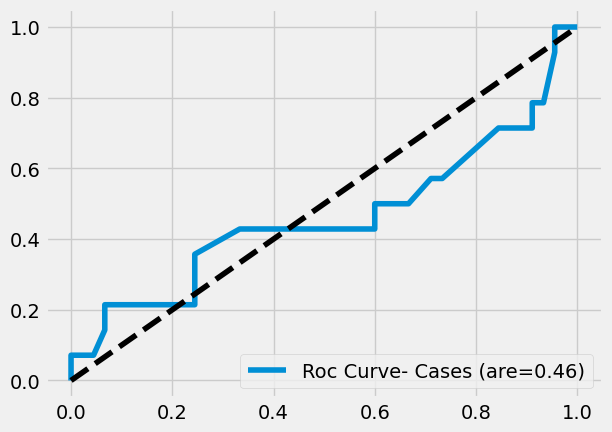

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label='Roc Curve- Cases (are=%0.2f)' % roc_auc) 
plt.plot([0,1],[0,1], 'k--')
plt.legend(loc='lower right');

In [ ]:
print('ROC Score:', roc_auc_score(y_test, y_pred))

ROC Score: 0.4626984126984127


####Defining Labels and showing a plot of the rate of depression among Males and Females

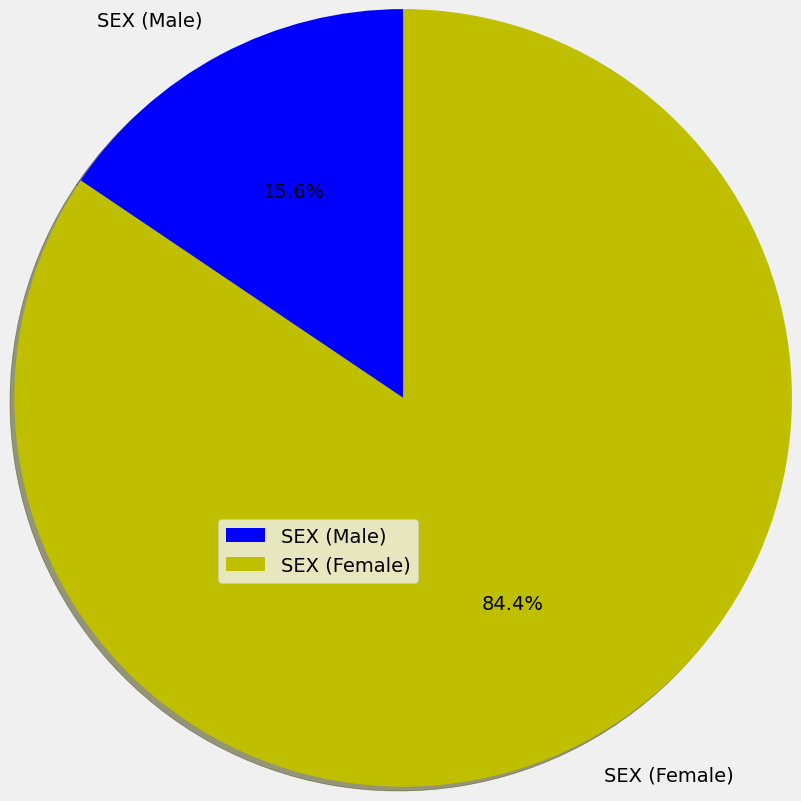

In [ ]:
Depressed = ['SEX (Male)','SEX (Female)'] # portion covered by each label
slices = [7, 38]
# color for each label
colors = ['b', 'y']
# plotting the pie chart
plt.pie(slices, labels = Depressed, colors=colors,
startangle=90, shadow = True, explode = (0, 0),
radius = 2.5, autopct = '%1.1f%%') # plotting legend
plt.legend();
# showing the plot plt.show()

###Building the Pipeline
###Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).

In [ ]:
num_attribs = ['CESD', 'INCOME']
cat_attribs = ['EDUCAT', 'SEX']

In [ ]:
col_transform = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_attribs),('num', MinMaxScaler(), num_attribs)])

####Create a pipeline that will transform the data and then run a LinearRegression.

In [ ]:
pipeline = Pipeline([('transform', col_transform), ('mlr_model', LinearRegression())])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['EDUCAT', 'SEX']),
                                                 ('num', MinMaxScaler(),
                                                  ['CESD', 'INCOME'])])),
                ('mlr_model', LinearRegression())])

####Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
y_train_pred = classifier.predict(X_train)
y_pred = classifier.predict(X_test)
y_pred

array([-0.08620776,  0.07817018, -0.07821858,  0.09523014, -0.08399286,
        0.21372281,  0.0683322 ,  0.0810151 ,  0.55173124,  0.31777258,
        0.47402312,  0.03701035,  1.21526721, -0.02062882,  0.43645289,
       -0.02026274, -0.0326817 ,  0.17501824,  0.70695395, -0.07913839,
        0.01760165, -0.12164272, -0.1157394 ,  0.70627119, -0.07470861,
        0.08950859,  0.0313651 ,  0.31283849,  0.15323871, -0.14139499,
        0.49113581, -0.0403542 ,  0.00391931,  0.46714139,  0.01056399,
        0.33517173,  0.06943965,  0.25931243,  0.46658767, -0.20169476,
        0.24309703, -0.09735853,  0.09860521,  0.22788256, -0.07858467,
       -0.11961546,  0.10508914,  0.08394446, -0.05612239,  0.14672307,
       -0.18229087, -0.0263268 , -0.03605676,  0.19629676,  0.25053248,
        0.60968708, -0.20557082,  0.98486795,  0.12536824])

####Calculate the root mean squared error for both train and test. 

In [ ]:
print(mean_squared_error(y_train, y_train_pred)**(0.0000001))
print(mean_squared_error(y_test, y_pred)**(0.0000001))

0.9999996897216388
0.9999997332272322


####Calculate the R-squared value of the model (test only).

In [ ]:
r2_score(y_test, y_pred)

0.6164836267661096

####Verifying that I am getting the same result

In [ ]:
classifier.score(X_test, y_test)

0.6164836267661096

####Splitting Data into Train/Test

####Create a data frame called X of your inputs that includes columns for health, employement, acute and chronic illness.

In [ ]:
X = df[['HEALTH', 'EMPLOY', 'ACUTEILL', 'CHRONILL']]
y = df['CASES']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

###Building the Pipeline
###Create a column transformer that will MinMax scale the numerical variables

In [ ]:
num_attribs = ['HEALTH', 'EMPLOY', 'ACUTEILL', 'CHRONILL']

###Create a pipeline that will transform the data and then run an Support Vector Machine Regression.

In [ ]:
col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)], remainder='passthrough')

In [ ]:
pipeline = Pipeline([('trans', col_transform),('SVCLinear', LinearSVC(C=1, max_iter=100000)),])
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['HEALTH', 'EMPLOY',
                                                   'ACUTEILL', 'CHRONILL'])])),
                ('SVCLinear', LinearSVC(C=1, max_iter=100000))])

###Executing the Model
###Run the pipeline to fit the Support Vector Machine Regression.

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['HEALTH', 'EMPLOY',
                                                   'ACUTEILL', 'CHRONILL'])])),
                ('SVCLinear', LinearSVC(C=1, max_iter=100000))])

###Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [ ]:
y_pred = pipeline.predict(X_test)

###Call the plot_cm function to generate the confusion matrix.

In [ ]:
plot_cm(y_test,y_pred)

array([[45,  0],
       [14,  0]])

####Using Gridsearch

####Initialize

In [ ]:
svr =LinearSVC()
sc = StandardScaler()
gd = GridSearchCV(svr, parameters)

In [ ]:
X_train_scale = sc.fit_transform(X_train)

In [ ]:
X_train_scale

array([[-0.91577499, -0.03358092,  1.60018938,  0.97064348],
       [-0.91577499, -0.69120728, -0.62492603,  0.97064348],
       [-0.91577499, -0.69120728, -0.62492603,  0.97064348],
       [-0.91577499, -0.03358092,  1.60018938, -1.03024439],
       [ 1.58663342, -0.03358092, -0.62492603,  0.97064348],
       [ 0.33542921, -0.69120728, -0.62492603,  0.97064348],
       [ 1.58663342,  1.28167181, -0.62492603,  0.97064348],
       [ 1.58663342,  1.28167181, -0.62492603,  0.97064348],
       [ 1.58663342,  1.28167181, -0.62492603,  0.97064348],
       [ 0.33542921, -0.69120728, -0.62492603,  0.97064348],
       [ 1.58663342, -0.69120728, -0.62492603,  0.97064348],
       [ 1.58663342, -0.69120728, -0.62492603,  0.97064348],
       [ 0.33542921, -0.69120728,  1.60018938,  0.97064348],
       [ 0.33542921, -0.03358092, -0.62492603, -1.03024439],
       [-0.91577499, -0.03358092, -0.62492603, -1.03024439],
       [-0.91577499, -0.69120728, -0.62492603, -1.03024439],
       [ 0.33542921, -0.

In [ ]:
parameters = {'n_estimators':[1, 10, 100, 1000],
              'min_samples_split':[12, 15, 23, 34]}

In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid=parameters, scoring='accuracy', cv=5)

In [ ]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['HEALTH',
                                                                          'EMPLOY',
                                                                          'ACUTEILL',
                                                                          'CHRONILL'])])),
                                       ('SVCLinear',
                                        LinearSVC(C=1, max_iter=100000))]),
             param_grid={'min_samples_split': [12, 15, 23, 34],
                         'n_estimators': [1, 10, 100, 1000]},
             scoring='accuracy')

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
lin_reg = LinearRegression()
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

In [ ]:
rmse_list = []

In [ ]:
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

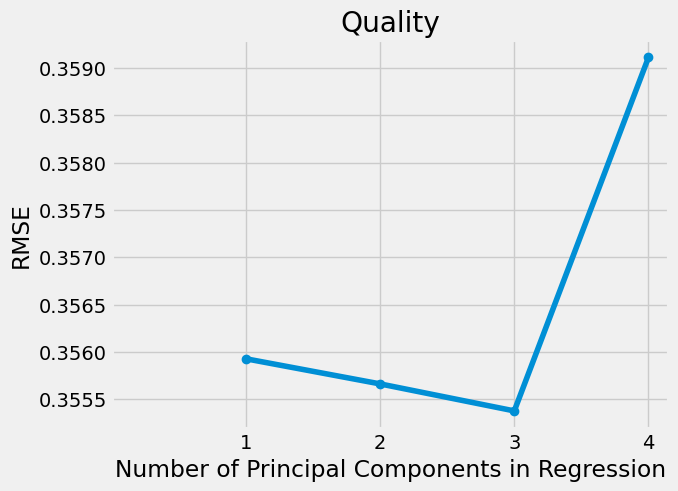

In [ ]:
#Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o');
plt.xlabel('Number of Principal Components in Regression');
plt.ylabel('RMSE');
plt.title('Quality');
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1));

###Conclusion: 
Based on the results of mean square error values were fairly close form both linear and SVM Regression models. With the adjusted R-squared being 0.616, the values show decent accuracy with this fairly large data set. The ROC Curve shows a score of 0.4627, with a ROC score the True Positive, and False Negative Rates a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. Therefore in this scenario the accuracy of the prediction was upheld but it was definitely not ideal, but it would be even better if the scores for R-square were over 0.75%. The PCR is telling us that based on the quality related process monitoring for the system being used that the smaller number of principal components represents most of the variability in the data and (presumptively) the relationship with the target variable. In this case the quality from PC1 to PC4 varies less than 0.0035. Based on the current data set there is an indication that 84% of females and 16% of males suffuer from some form of depression based on the level of education, income, illness, and overall health.